# Challenges in Machine Learning
- Bad Data
- Bad Algorithm

# Bad Data

## Insufficient Quality Data
It takes a lot of data for ML algorithms to work properly <br>
<img src="images/importance_of_data.png" style="height:300px;"> <br>
Source: https://dl.acm.org/doi/10.3115/1073012.1073017

As the author puts it,
> these results suggest that we may want to reconsider the trade-off between spending time and money on algorithm development versus spending it on corpus development

## Nonrepresentative Training Data

### We lied
```py
df = df[(df['GDP'] > 25000) & (df['GDP'] < 60000)]
```

In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("unsdsn/world-happiness")

happiness_df = pd.read_csv(path + "/2017.csv")

path = kagglehub.dataset_download("nitishabharathi/gdp-per-capita-all-countries")

gdp_df = pd.read_csv(path + "/GDP.csv")

happiness_df = happiness_df[['Country', 'Happiness.Score']]
gdp_df = gdp_df[['Country ', '2017']]


gdp_df = gdp_df.rename(columns={'Country ': 'Country', '2017': 'GDP'})
combined_df = pd.merge(
    happiness_df,
    gdp_df,
    on='Country',  # Same column name after renaming
    how='inner'
)
df = combined_df.dropna()

/home/roundspecs/Developer/learning_ml/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_old = df[(df['GDP'] > 25000) & (df['GDP'] < 60000)]

<Axes: xlabel='GDP', ylabel='Happiness.Score'>

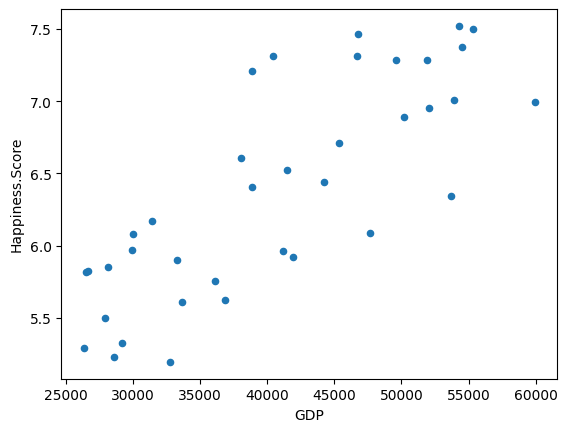

In [4]:
df_old[['Happiness.Score', 'GDP']].plot.scatter(
  x='GDP', y='Happiness.Score'
)

<Axes: xlabel='GDP', ylabel='Happiness.Score'>

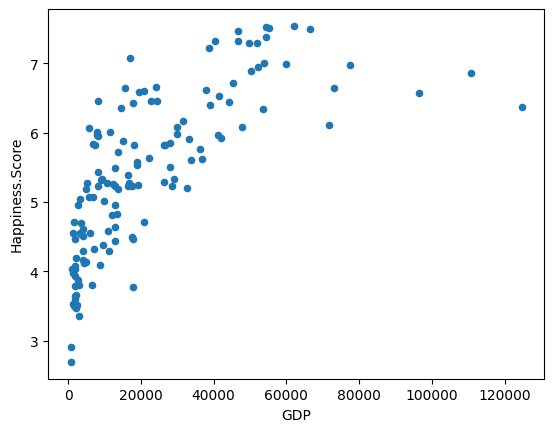

In [2]:
df[['Happiness.Score', 'GDP']].plot.scatter(
  x='GDP', y='Happiness.Score'
)

## Poor-Quality Data

## Irrelevant Features

# Bad Algorithm